In [762]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Data Load and Clean Up

In [763]:
#Load Crime data
crime_data =pd.read_csv('./Boston_Crime_Data/combined_2015-2020_allcrime_Boston.csv')
print(crime_data.shape)
print(crime_data.head())
print(crime_data.dtypes)

(491756, 17)
  INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0       854652314          3115                NaN   
1       457856954          3115                NaN   
2       302030654          1106                NaN   
3       212025777          1108                NaN   
4       212025557          2670                NaN   

               OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0               INVESTIGATE PERSON       B2            289        0   
1               INVESTIGATE PERSON       B2            289        0   
2  FRAUD - CREDIT CARD / ATM FRAUD       D4            167        0   
3                  FRAUD - WELFARE       A7             28        0   
4  HARASSMENT/ CRIMINAL HARASSMENT       A1             77        0   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR UCR_PART  \
0  2020-02-20 00:00:00  2020      2    Thursday     0      NaN   
1  2020-02-21 01:42:00  2020      2      Friday     1      NaN   
2  2020-04-24 13:00:00  2020      4  

/Users/samuelomosuyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [764]:
crime_data.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
491751,I100033064-00,2910,Violations,VAL - OPERATING AFTER REV/SUSP.,B2,304,NaN,2016-07-29 18:20:00,2016,7,Friday,18,Part Two,SLAYTON WAY,42.321770,-71.097798,"(42.32177032, -71.09779774)"
491752,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"
491753,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"
491754,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
491755,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [765]:
crime_data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,491756.000000,491756.000000,491756.000000,491756.000000,469226.000000,4.692260e+05
mean,2318.790431,2017.488380,6.662117,13.058911,36.078852,-6.060178e+01
std,1196.842223,1.564661,3.306926,6.327377,15.011033,2.520048e+01
min,100.000000,2015.000000,1.000000,0.000000,-1.000000,-7.117867e+01
25%,1001.000000,2016.000000,4.000000,9.000000,42.282677,-7.109221e+01
50%,3004.000000,2017.000000,7.000000,14.000000,42.315877,-7.107221e+01
75%,3201.000000,2019.000000,9.000000,18.000000,42.344140,-7.105482e+01
max,99999.000000,2020.000000,12.000000,23.000000,42.395042,5.249691e-08


In [766]:
#missing data
crime_data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     138503
OFFENSE_DESCRIPTION         0
DISTRICT                 2417
REPORTING_AREA              0
SHOOTING               351798
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               138600
STREET                  11207
Lat                     22530
Long                    22530
Location                    0
dtype: int64

In [767]:
#crime data cleanup
print(crime_data.groupby('OFFENSE_DESCRIPTION').size())
print(crime_data.groupby('OFFENSE_CODE_GROUP').size())
print(crime_data.groupby('DISTRICT').size())
print(crime_data.groupby('YEAR').size())
print(crime_data.groupby('SHOOTING').size())

OFFENSE_DESCRIPTION
A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.                        1
A&B ON POLICE OFFICER                                               7
ABDUCTION - INTICING                                               11
AFFRAY                                                            299
AIRCRAFT INCIDENTS                                                 75
                                                                 ... 
WEAPON - FIREARM - OTHER VIOLATION                                273
WEAPON - FIREARM - SALE / TRAFFICKING                              16
WEAPON - OTHER - CARRYING / POSSESSING, ETC                       796
WEAPON - OTHER - OTHER VIOLATION                                  170
WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER    291
Length: 309, dtype: int64
OFFENSE_CODE_GROUP
Aggravated Assault                   8751
Aircraft                               48
Arson                                  95
Assembly or Gathering Violations     10

In [768]:
#crime with no district, #mark as not available
crime_no_district = crime_data[crime_data.DISTRICT.isnull()]
crime_no_district.head(10)
crime_data['DISTRICT_NEW'] = np.where(crime_data.DISTRICT.isnull(),'Not Available',crime_data['DISTRICT'])
print("\nNumber of rows with no specified district:", crime_data.DISTRICT_NEW.isnull().sum())
print(crime_data.groupby('DISTRICT_NEW').size())


Number of rows with no specified district: 0
DISTRICT_NEW
A1               53785
A15              10274
A7               20174
B2               76973
B3               55485
C11              65535
C6               36050
D14              31429
D4               63619
E13              27319
E18              27317
E5               21130
External           249
Not Available     2417
dtype: int64


In [769]:
#crime with no long or lat
crime_data[crime_data.Lat.isnull()].head(10)
# if no offense code group available - mark as other
crime_data['OFFENSE_CODE_GROUP_NEW'] = np.where(crime_data.OFFENSE_CODE_GROUP.isnull(),'none',crime_data['OFFENSE_CODE_GROUP'])
crime_data['OFFENSE_CODE_GROUP_NEW'] = crime_data['OFFENSE_CODE_GROUP_NEW'].str.lower()
print("\nNumber of rows with no specified offense group:", crime_data.OFFENSE_CODE_GROUP_NEW.isnull().sum())
crime_data['OFFENSE_CODE_GROUP_NEW'].value_counts(dropna=True, sort=True).reset_index(name='count')


Number of rows with no specified offense group: 0


,index,count
0,none,138503
1,motor vehicle accident response,41064
2,larceny,28906
3,medical assistance,26211
4,investigate person,20425
...,...,...
62,human trafficking,8
63,gambling,8
64,burglary - no property taken,5
65,biological threat,2


In [770]:
#create incident year-month
crime_data['YEAR_MONTH']   = pd.to_datetime(crime_data['OCCURRED_ON_DATE']).dt.strftime("%Y%m")
print(crime_data.groupby(['YEAR_MONTH']).size())
print(crime_data["YEAR_MONTH"].min())
print(crime_data["YEAR_MONTH"].max())

YEAR_MONTH
201506    4200
201507    8369
201508    8395
201509    8433
201510    8340
          ... 
202008    6533
202009    6484
202010    6766
202011    5770
202012    5602
Length: 64, dtype: int64
201506
202012


In [771]:
#clean up shooting flag
print(crime_data.groupby('SHOOTING').size())
crime_data['SHOOTING_NEW'] = crime_data['SHOOTING'].astype(str).apply(lambda x: 1 if x == 'Y' or x == '1' else 0)
print(crime_data.groupby('SHOOTING_NEW').size())
print("\nNumber of rows with no specified shooting:", crime_data.SHOOTING_NEW.isnull().sum())

SHOOTING
0    96941
1     1363
0    39823
1      376
Y     1455
dtype: int64
SHOOTING_NEW
0    488562
1      3194
dtype: int64

Number of rows with no specified shooting: 0


In [772]:
#select key fields
print(crime_data.dtypes)
crime_data_main = crime_data[['YEAR','YEAR_MONTH','OCCURRED_ON_DATE','INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION',
                              'OFFENSE_CODE_GROUP_NEW','DISTRICT_NEW','STREET','Lat','Long','SHOOTING_NEW']]
print(crime_data_main.head())
print(crime_data_main.dtypes)

INCIDENT_NUMBER            object
OFFENSE_CODE                int64
OFFENSE_CODE_GROUP         object
OFFENSE_DESCRIPTION        object
DISTRICT                   object
REPORTING_AREA             object
SHOOTING                   object
OCCURRED_ON_DATE           object
YEAR                        int64
MONTH                       int64
DAY_OF_WEEK                object
HOUR                        int64
UCR_PART                   object
STREET                     object
Lat                       float64
Long                      float64
Location                   object
DISTRICT_NEW               object
OFFENSE_CODE_GROUP_NEW     object
YEAR_MONTH                 object
SHOOTING_NEW                int64
dtype: object
   YEAR YEAR_MONTH     OCCURRED_ON_DATE INCIDENT_NUMBER  OFFENSE_CODE  \
0  2020     202002  2020-02-20 00:00:00       854652314          3115   
1  2020     202002  2020-02-21 01:42:00       457856954          3115   
2  2020     202004  2020-04-24 13:00:00       3020306

In [773]:
crime_data_main.describe()

,YEAR,OFFENSE_CODE,Lat,Long,SHOOTING_NEW
count,491756.000000,491756.000000,469226.000000,4.692260e+05,491756.000000
mean,2017.488380,2318.790431,36.078852,-6.060178e+01,0.006495
std,1.564661,1196.842223,15.011033,2.520048e+01,0.080330
min,2015.000000,100.000000,-1.000000,-7.117867e+01,0.000000
25%,2016.000000,1001.000000,42.282677,-7.109221e+01,0.000000
50%,2017.000000,3004.000000,42.315877,-7.107221e+01,0.000000
75%,2019.000000,3201.000000,42.344140,-7.105482e+01,0.000000
max,2020.000000,99999.000000,42.395042,5.249691e-08,1.000000


In [774]:
shoot_data =pd.read_csv('./Boston_Crime_Data/Boston_Allshooting_2015-2021.csv')
print(shoot_data.shape)
shoot_data.head()

(1586, 8)


,Incident_Num,Shooting_Date,District,Shooting_Type_V2,Victim_Gender,Victim_Race,Victim_Ethnicity_NIBRS,Multi_Victim
0,I152000196-00,2015-01-01 13:30:00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t


In [775]:
#missing data
shoot_data.isnull().sum()

Incident_Num               0
Shooting_Date              0
District                   0
Shooting_Type_V2           0
Victim_Gender              9
Victim_Race               18
Victim_Ethnicity_NIBRS    24
Multi_Victim               0
dtype: int64

In [776]:
#crime data cleanup
print("\nNumber of rows with no specified incident number:", shoot_data.Incident_Num.isnull().sum())
print("\nNumber of rows with no specified district:", shoot_data.District.isnull().sum())
print(shoot_data.groupby('District').size())
print("\nNumber of rows with no specified shoot_type code:", shoot_data.Shooting_Type_V2.isnull().sum())
print(shoot_data.groupby('Shooting_Type_V2').size())
print("\nNumber of rows with no specified gender:", shoot_data.Victim_Gender.isnull().sum())
print(shoot_data.groupby('Victim_Gender').size())
print("\nNumber of rows with no specified race:", shoot_data.Victim_Race.isnull().sum())
print(shoot_data.groupby('Victim_Race').size())


Number of rows with no specified incident number: 0

Number of rows with no specified district: 0
District
A1      17
A15      9
A7      25
B2     498
B3     396
C11    270
C6      47
D14     19
D4      69
E13    130
E18     81
E5      25
dtype: int64

Number of rows with no specified shoot_type code: 0
Shooting_Type_V2
Fatal         261
Non-Fatal    1325
dtype: int64

Number of rows with no specified gender: 9
Victim_Gender
Female     161
Male      1416
dtype: int64

Number of rows with no specified race: 18
Victim_Race
Asian                           6
Black or African American    1258
Unknown                        55
White                         249
dtype: int64


In [777]:
#format incident num I152002233-00
shoot_data['INCIDENT_NUM_NEW'] = shoot_data['Incident_Num'].str.split('-').str[0]
print("\nNumber of rows with no specified incident number:", shoot_data.INCIDENT_NUM_NEW.isnull().sum())
#fill race and gender with unknow
shoot_data['VICTIM_GENDER_NEW'] = np.where(shoot_data.Victim_Gender.isnull(),'Unknown',shoot_data['Victim_Gender'])
print(shoot_data.groupby('VICTIM_GENDER_NEW').size())
shoot_data['VICTIM_RACE_NEW']   = np.where(shoot_data.Victim_Race.isnull(),'Unknown',shoot_data['Victim_Race'])
print(shoot_data.groupby('VICTIM_RACE_NEW').size())
shoot_data['YEAR_MONTH']   = pd.to_datetime(shoot_data['Shooting_Date']).dt.strftime("%Y%m")
print(shoot_data.groupby('YEAR_MONTH').size())


Number of rows with no specified incident number: 0
VICTIM_GENDER_NEW
Female      161
Male       1416
Unknown       9
dtype: int64
VICTIM_RACE_NEW
Asian                           6
Black or African American    1258
Unknown                        73
White                         249
dtype: int64
YEAR_MONTH
201501    21
201502     4
201503    19
201504    12
201505    25
          ..
202107    31
202108    20
202109    16
202110    14
202111    15
Length: 83, dtype: int64


In [778]:
#is shooting incident data in crime data
shoot_data['IN_CRIME_DATA'] = shoot_data['INCIDENT_NUM_NEW'].isin(crime_data_main.INCIDENT_NUMBER)
shoot_data.groupby(['IN_CRIME_DATA'])['INCIDENT_NUM_NEW'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,IN_CRIME_DATA,count
1,True,1100
0,False,486


In [779]:
#shooting without crime reported
shoot_data_no_crime =shoot_data[shoot_data['IN_CRIME_DATA']==False]
shoot_data_no_crime.head(10)

,Incident_Num,Shooting_Date,District,Shooting_Type_V2,Victim_Gender,Victim_Race,Victim_Ethnicity_NIBRS,Multi_Victim,INCIDENT_NUM_NEW,VICTIM_GENDER_NEW,VICTIM_RACE_NEW,YEAR_MONTH,IN_CRIME_DATA
0,I152000196-00,2015-01-01 13:30:00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,I152000196,Male,Black or African American,201501,False
1,I152000879-00,2015-01-04 01:58:00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,I152000879,Male,Black or African American,201501,False
2,I152001014-00,2015-01-04 18:52:00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,I152001014,Male,Black or African American,201501,False
3,I152002232-00,2015-01-08 22:45:00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t,I152002232,Male,Black or African American,201501,False
4,I152002233-00,2015-01-08 22:45:00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t,I152002233,Female,Black or African American,201501,False
5,I152002234-00,2015-01-08 22:45:00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t,I152002234,Male,Black or African American,201501,False
6,I152002215-00,2015-01-08 22:45:00,B2,Fatal,Male,Black or African American,Not Hispanic or Latinx,t,I152002215,Male,Black or African American,201501,False
7,I152003226-00,2015-01-12 23:58:00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,I152003226,Male,Black or African American,201501,False
8,I152004092-00,2015-01-16 02:25:00,B3,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,I152004092,Male,Black or African American,201501,False
9,I152005490-00,2015-01-20 23:30:00,E13,Non-Fatal,Male,White,Hispanic or Latinx,f,I152005490,Male,White,201501,False


In [780]:
print(shoot_data.dtypes)
shoot_data_main = shoot_data[['INCIDENT_NUM_NEW','Shooting_Date','Shooting_Type_V2','VICTIM_GENDER_NEW',
                              'VICTIM_RACE_NEW']]
print(shoot_data_main.head())
print(shoot_data_main.dtypes)

Incident_Num              object
Shooting_Date             object
District                  object
Shooting_Type_V2          object
Victim_Gender             object
Victim_Race               object
Victim_Ethnicity_NIBRS    object
Multi_Victim              object
INCIDENT_NUM_NEW          object
VICTIM_GENDER_NEW         object
VICTIM_RACE_NEW           object
YEAR_MONTH                object
IN_CRIME_DATA               bool
dtype: object
  INCIDENT_NUM_NEW        Shooting_Date Shooting_Type_V2 VICTIM_GENDER_NEW  \
0       I152000196  2015-01-01 13:30:00        Non-Fatal              Male   
1       I152000879  2015-01-04 01:58:00        Non-Fatal              Male   
2       I152001014  2015-01-04 18:52:00        Non-Fatal              Male   
3       I152002232  2015-01-08 22:45:00        Non-Fatal              Male   
4       I152002233  2015-01-08 22:45:00        Non-Fatal            Female   

             VICTIM_RACE_NEW  
0  Black or African American  
1  Black or African Americ

In [781]:
#main boston crime and shooting data
boston_crime_shoot_data = crime_data_main.merge(shoot_data_main, left_on='INCIDENT_NUMBER', right_on='INCIDENT_NUM_NEW', how='left')#.drop(['cand_nm'],axis=1)
boston_crime_shoot_data['MONTH'] = pd.to_datetime(boston_crime_shoot_data['OCCURRED_ON_DATE']).dt.strftime("%Y-%m-%d")
print(boston_crime_shoot_data.head())
print(boston_crime_shoot_data.groupby(['SHOOTING_NEW','Shooting_Type_V2']).size())
print(boston_crime_shoot_data.groupby(['SHOOTING_NEW']).size())

   YEAR YEAR_MONTH     OCCURRED_ON_DATE INCIDENT_NUMBER  OFFENSE_CODE  \
0  2020     202002  2020-02-20 00:00:00       854652314          3115   
1  2020     202002  2020-02-21 01:42:00       457856954          3115   
2  2020     202004  2020-04-24 13:00:00       302030654          1106   
3  2020     202005  2020-05-01 00:00:00       212025777          1108   
4  2020     202009  2020-09-07 00:00:00       212025557          2670   

               OFFENSE_DESCRIPTION OFFENSE_CODE_GROUP_NEW DISTRICT_NEW  \
0               INVESTIGATE PERSON                   none           B2   
1               INVESTIGATE PERSON                   none           B2   
2  FRAUD - CREDIT CARD / ATM FRAUD                   none           D4   
3                  FRAUD - WELFARE                   none           A7   
4  HARASSMENT/ CRIMINAL HARASSMENT                   none           A1   

              STREET        Lat       Long  SHOOTING_NEW INCIDENT_NUM_NEW  \
0      SCHROEDER PLZ  42.333679 -71.091

In [782]:
boston_crime_shoot_data['MONTH'] = pd.to_datetime(boston_crime_shoot_data['MONTH']) + pd.offsets.MonthBegin(-1)
boston_crime_shoot_data.head()

,YEAR,YEAR_MONTH,OCCURRED_ON_DATE,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP_NEW,DISTRICT_NEW,STREET,Lat,Long,SHOOTING_NEW,INCIDENT_NUM_NEW,Shooting_Date,Shooting_Type_V2,VICTIM_GENDER_NEW,VICTIM_RACE_NEW,MONTH
0,2020,202002,2020-02-20 00:00:00,854652314,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
1,2020,202002,2020-02-21 01:42:00,457856954,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
2,2020,202004,2020-04-24 13:00:00,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,none,D4,MASSACHUSETTS AVE,42.339542,-71.069409,0,NaN,NaN,NaN,NaN,NaN,2020-04-01
3,2020,202005,2020-05-01 00:00:00,212025777,1108,FRAUD - WELFARE,none,A7,TRENTON ST,42.370818,-71.039291,0,NaN,NaN,NaN,NaN,NaN,2020-04-01
4,2020,202009,2020-09-07 00:00:00,212025557,2670,HARASSMENT/ CRIMINAL HARASSMENT,none,A1,PRINCE ST,42.361839,-71.059765,0,NaN,NaN,NaN,NaN,NaN,2020-09-01


In [783]:
boston_crime_shoot_data['SHOOTING_NEW']   = np.where(boston_crime_shoot_data.Shooting_Type_V2.notnull(),1,boston_crime_shoot_data['SHOOTING_NEW'])
boston_crime_shoot_data.groupby(['SHOOTING_NEW','Shooting_Type_V2']).size()
boston_crime_shoot_data.groupby(['SHOOTING_NEW']).size()

SHOOTING_NEW
0    488538
1      4028
dtype: int64

In [784]:
boston_crime_shoot_data.head()

,YEAR,YEAR_MONTH,OCCURRED_ON_DATE,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP_NEW,DISTRICT_NEW,STREET,Lat,Long,SHOOTING_NEW,INCIDENT_NUM_NEW,Shooting_Date,Shooting_Type_V2,VICTIM_GENDER_NEW,VICTIM_RACE_NEW,MONTH
0,2020,202002,2020-02-20 00:00:00,854652314,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
1,2020,202002,2020-02-21 01:42:00,457856954,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
2,2020,202004,2020-04-24 13:00:00,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,none,D4,MASSACHUSETTS AVE,42.339542,-71.069409,0,NaN,NaN,NaN,NaN,NaN,2020-04-01
3,2020,202005,2020-05-01 00:00:00,212025777,1108,FRAUD - WELFARE,none,A7,TRENTON ST,42.370818,-71.039291,0,NaN,NaN,NaN,NaN,NaN,2020-04-01
4,2020,202009,2020-09-07 00:00:00,212025557,2670,HARASSMENT/ CRIMINAL HARASSMENT,none,A1,PRINCE ST,42.361839,-71.059765,0,NaN,NaN,NaN,NaN,NaN,2020-09-01


## Analysis

In [785]:
!pip install shapely
!pip install geopandas
!pip install folium

In [786]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd # geospatial data processing
import numpy as np # linear algebra
import folium # mapping
from folium.plugins import HeatMap
import seaborn as sns # visualization

In [787]:
# Boston Crime Over time

In [788]:
crime_trend = boston_crime_shoot_data.groupby('YEAR')['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)
print(crime_trend)

fatal_shoot_trend  = boston_crime_shoot_data[boston_crime_shoot_data['Shooting_Type_V2']=='Fatal']
fatal_shoot_trend  = fatal_shoot_trend.groupby('YEAR')['INCIDENT_NUMBER'].count().reset_index(name='FatalShootings').sort_values(['FatalShootings'], ascending=False)
print(fatal_shoot_trend)

nonfatal_shoot_trend = boston_crime_shoot_data[boston_crime_shoot_data['Shooting_Type_V2']=='Non-Fatal']
nonfatal_shoot_trend = nonfatal_shoot_trend.groupby('YEAR')['INCIDENT_NUMBER'].count().reset_index(name='NonFatalShootings').sort_values(['NonFatalShootings'], ascending=False)
print(nonfatal_shoot_trend)

   YEAR  NumberofCrimes
2  2017          101536
1  2016           99598
3  2018           99092
5  2020           70911
4  2019           67638
0  2015           53791
   YEAR  FatalShootings
3  2018             158
1  2016             115
2  2017             115
0  2015              93
4  2019              23
5  2020              17
   YEAR  NonFatalShootings
2  2017                540
3  2018                441
1  2016                395
0  2015                352
4  2019                131
5  2020                104


In [789]:
overall_crime_trend = crime_trend.merge(fatal_shoot_trend, left_on='YEAR', right_on='YEAR', how='left')
overall_crime_trend = overall_crime_trend.merge(nonfatal_shoot_trend, left_on='YEAR', right_on='YEAR', how='left')
overall_crime_trend = overall_crime_trend.sort_values(by='YEAR',ascending=True)
overall_crime_trend.head()

,YEAR,NumberofCrimes,FatalShootings,NonFatalShootings
5,2015,53791,93,352
1,2016,99598,115,395
0,2017,101536,115,540
2,2018,99092,158,441
4,2019,67638,23,131


In [790]:
overall_crime_trend['NumberofCrimes'].mean()

82094.33333333333

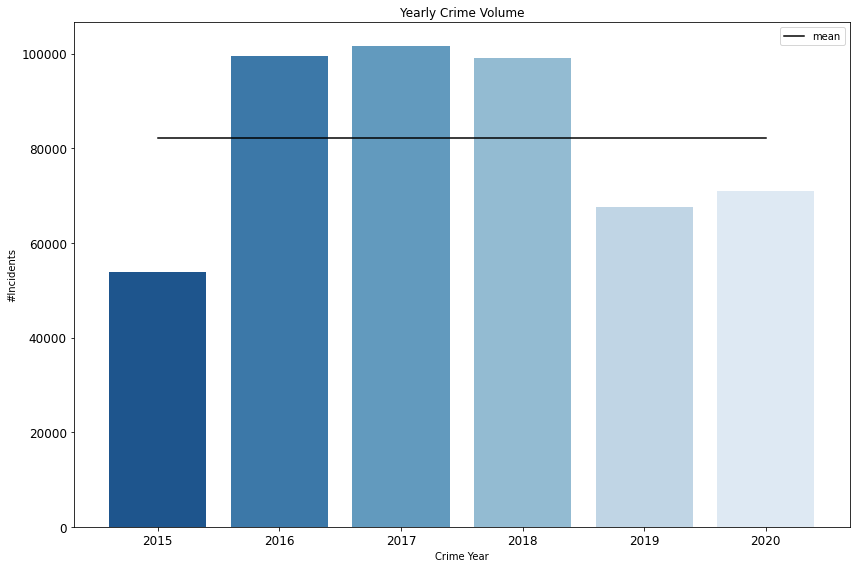

In [791]:
plt.figure(figsize = (12,8))
sns.barplot(x = overall_crime_trend.YEAR, y = 'NumberofCrimes', data = overall_crime_trend, palette = 'Blues_r')
sns.lineplot(x = overall_crime_trend.index, y = overall_crime_trend['NumberofCrimes'].mean(), data = overall_crime_trend, label = 'mean', color = 'black') # plot mean value
plt.title("Yearly Crime Volume")
plt.xlabel("Crime Year")
plt.ylabel("#Incidents")
plt.tick_params(labelsize = 12)
plt.tight_layout()

Text(0, 0.5, '#Incidents')

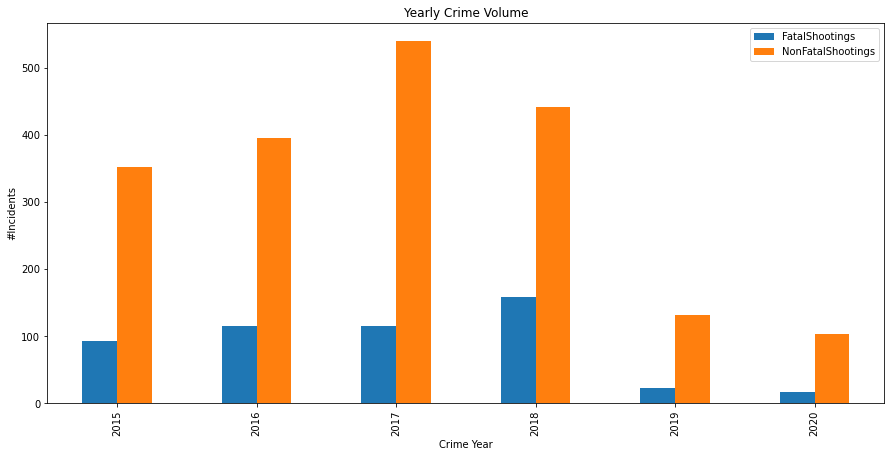

In [792]:
#ax = overall_crime_trend[['YEAR','NumberofCrimes']].plot(x="YEAR", y=["NumberofCrimes"],kind='bar',figsize=(20,10))
overall_crime_trend[['YEAR','FatalShootings', 'NonFatalShootings']].plot(x='YEAR', kind='bar',figsize=(15,7))
plt.title("Yearly Crime Volume")
plt.xlabel("Crime Year")
plt.ylabel("#Incidents")

Text(0, 0.5, '#Shooting Incidents')

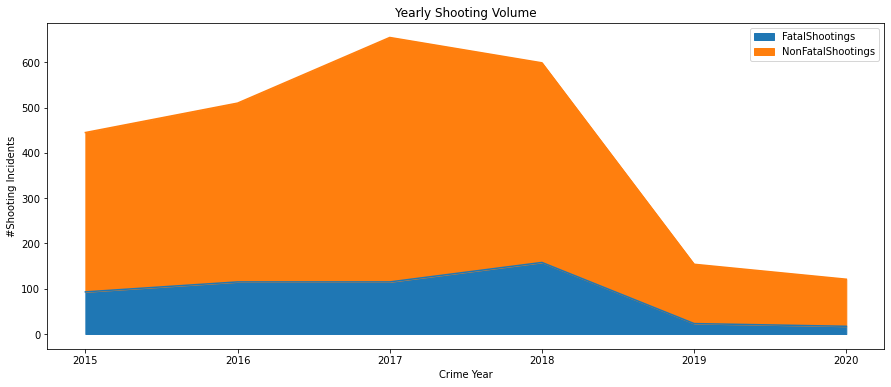

In [793]:
overall_crime_trend[['YEAR','FatalShootings', 'NonFatalShootings']].plot(x="YEAR",kind="area",stacked=True,figsize=(15,6))
plt.title("Yearly Shooting Volume")
plt.xlabel("Crime Year")
plt.ylabel("#Shooting Incidents")

In [794]:
overall_crime_trend['totalShootings'] = overall_crime_trend['FatalShootings'] + overall_crime_trend['NonFatalShootings']
overall_crime_trend

,YEAR,NumberofCrimes,FatalShootings,NonFatalShootings,totalShootings
5,2015,53791,93,352,445
1,2016,99598,115,395,510
0,2017,101536,115,540,655
2,2018,99092,158,441,599
4,2019,67638,23,131,154
3,2020,70911,17,104,121


In [795]:
print('Mean Total Shooting: ',overall_crime_trend['totalShootings'].mean())
print('Mean Fatal Shooting: ',overall_crime_trend['FatalShootings'].mean())
print('Mean NonFatal Shooting: ',overall_crime_trend['NonFatalShootings'].mean())


Mean Total Shooting:  414.0
Mean Fatal Shooting:  86.83333333333333
Mean NonFatal Shooting:  327.1666666666667


In [796]:
#percent Change
overall_crime_trend_pct_change = overall_crime_trend.set_index('YEAR')
overall_crime_trend_pct_change = overall_crime_trend_pct_change.pct_change()
overall_crime_trend_pct_change.head()

,NumberofCrimes,FatalShootings,NonFatalShootings,totalShootings
YEAR,,,,
2015,NaN,NaN,NaN,NaN
2016,0.851574,0.236559,0.122159,0.146067
2017,0.019458,0.000000,0.367089,0.284314
2018,-0.024070,0.373913,-0.183333,-0.085496
2019,-0.317422,-0.854430,-0.702948,-0.742905


In [797]:
overall_crime_trend_pct_change = overall_crime_trend_pct_change.reset_index()

In [798]:
overall_crime_trend_pct_change

,YEAR,NumberofCrimes,FatalShootings,NonFatalShootings,totalShootings
0,2015,NaN,NaN,NaN,NaN
1,2016,0.851574,0.236559,0.122159,0.146067
2,2017,0.019458,0.000000,0.367089,0.284314
3,2018,-0.024070,0.373913,-0.183333,-0.085496
4,2019,-0.317422,-0.854430,-0.702948,-0.742905
5,2020,0.048390,-0.260870,-0.206107,-0.214286


/var/folders/bt/5kl7zb6j35v3n70l6dt1khcr0000gn/T/ipykernel_13814/3067803356.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chg.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


Text(0, 0.5, '#Incidents')

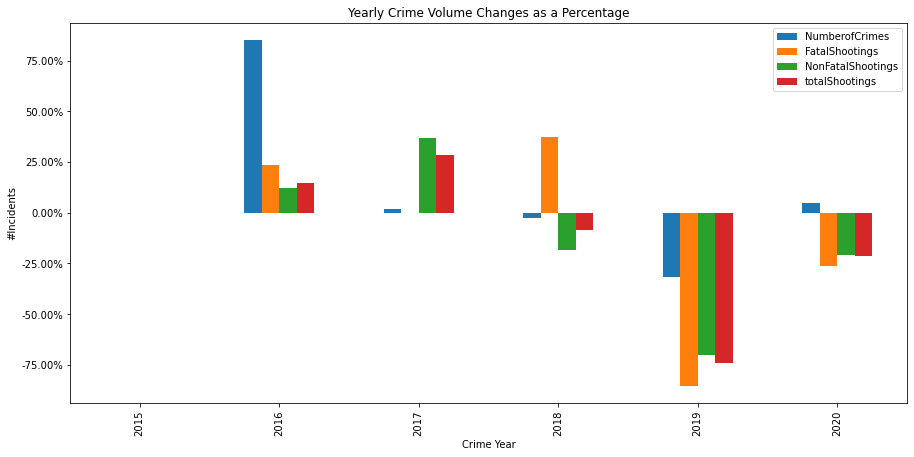

In [799]:
#Crime Changes Over Time
chg = overall_crime_trend_pct_change[['YEAR','NumberofCrimes','FatalShootings','NonFatalShootings','totalShootings']].plot(x='YEAR', kind='bar',figsize=(15,7))
vals = chg.get_yticks()
chg.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.title("Yearly Crime Volume Changes as a Percentage")
plt.xlabel("Crime Year")
plt.ylabel("#Incidents")

/var/folders/bt/5kl7zb6j35v3n70l6dt1khcr0000gn/T/ipykernel_13814/2652855128.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


Text(0, 0.5, '% of Shooting')

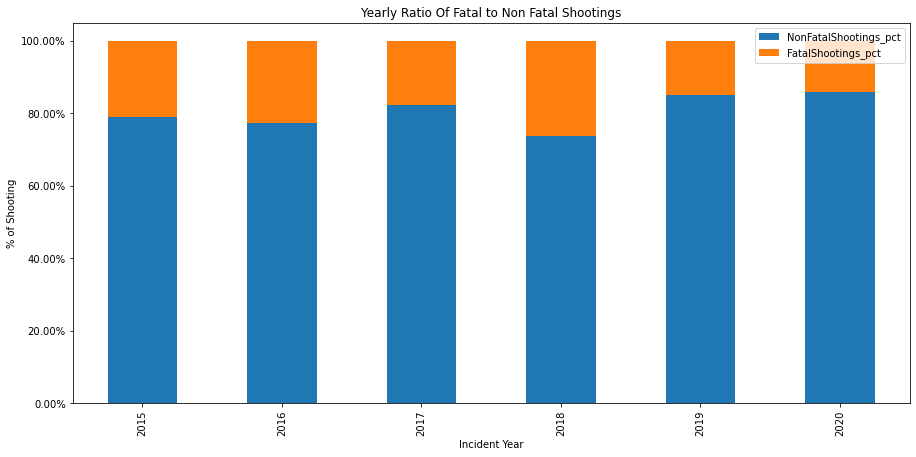

In [800]:

overall_crime_trend['FatalShootings_pct'] = overall_crime_trend['FatalShootings']/overall_crime_trend['totalShootings']
overall_crime_trend['NonFatalShootings_pct'] = overall_crime_trend['NonFatalShootings']/overall_crime_trend['totalShootings']
overall_crime_trend['totalShootings_pct'] = overall_crime_trend['totalShootings']/overall_crime_trend['NumberofCrimes']
ax =overall_crime_trend[['YEAR', 'NonFatalShootings_pct','FatalShootings_pct']].plot(x="YEAR",kind="bar",stacked=True,figsize=(15,7))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.title("Yearly Ratio Of Fatal to Non Fatal Shootings")
plt.xlabel("Incident Year")
plt.ylabel("% of Shooting")

In [801]:
# Fatal vs Non Fatal shootings
shootings_sum = overall_crime_trend[['FatalShootings', 'NonFatalShootings']]
shootings_sum = shootings_sum.sum()
shootings_sum

FatalShootings        521
NonFatalShootings    1963
dtype: int64

In [802]:
shootings_sum.sum()

2484

In [803]:
number = shootings_sum.values
label = shootings_sum.index

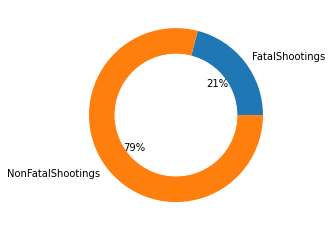

In [804]:
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(number,labels=label,autopct='%1.0f%%')
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

                       OFFENSE_CODE_GROUP_NEW  NumberofCrimes
43                                       none          138549
42            motor vehicle accident response           41066
33                                    larceny           28906
39                         medical assistance           26235
30                         investigate person           20439
..                                        ...             ...
23                                   gambling               8
28                          human trafficking               8
9                burglary - no property taken               5
29  human trafficking - involuntary servitude               2
7                           biological threat               2

[67 rows x 2 columns]


Text(0, 0.5, '#Incidents')

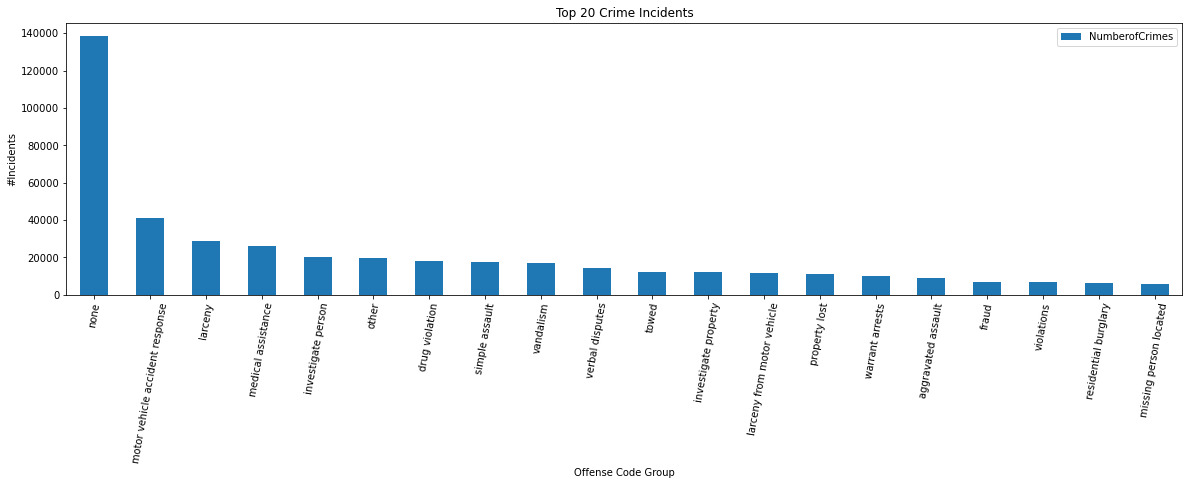

In [805]:
#Incident Types Group Top 20
crime_types = boston_crime_shoot_data.groupby(['OFFENSE_CODE_GROUP_NEW'])['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)
print(crime_types)
crime_types = crime_types.head(20)
crime_types.plot(x="OFFENSE_CODE_GROUP_NEW", y=["NumberofCrimes"], kind="bar", figsize=(20,5))
plt.xticks(rotation=80)
plt.title("Top 20 Crime Incidents")
plt.xlabel("Offense Code Group")
plt.ylabel("#Incidents")

                              OFFENSE_DESCRIPTION  NumberofCrimes
138                            INVESTIGATE PERSON           30039
274                 SICK/INJURED/MEDICAL - PERSON           28465
177         M/V - LEAVING SCENE - PROPERTY DAMAGE           25241
290                                     VANDALISM           22663
21                       ASSAULT SIMPLE - BATTERY           20304
..                                            ...             ...
107                    Evidence Tracker Incidents               1
113          FIREARM/WEAPON - CARRY - SELL - RENT               1
120                        FRAUD - FALSE PRETENSE               1
125                            FRAUDS - ALL OTHER               1
0    A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.               1

[309 rows x 2 columns]


Text(0, 0.5, '#Incidents')

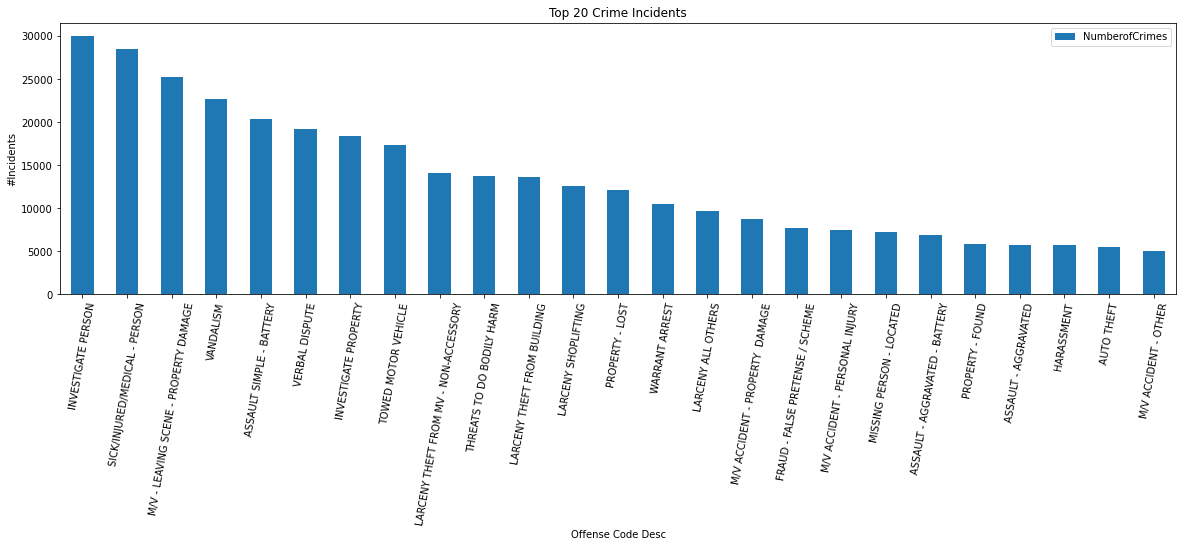

In [806]:
crime_types_desc = boston_crime_shoot_data.groupby(['OFFENSE_DESCRIPTION'])['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)
print(crime_types_desc)
crime_types_desc = crime_types_desc.head(25)
crime_types_desc.plot(x="OFFENSE_DESCRIPTION", y=["NumberofCrimes"], kind="bar", figsize=(20,5))
plt.xticks(rotation=80)
plt.title("Top 20 Crime Incidents")
plt.xlabel("Offense Code Desc")
plt.ylabel("#Incidents")

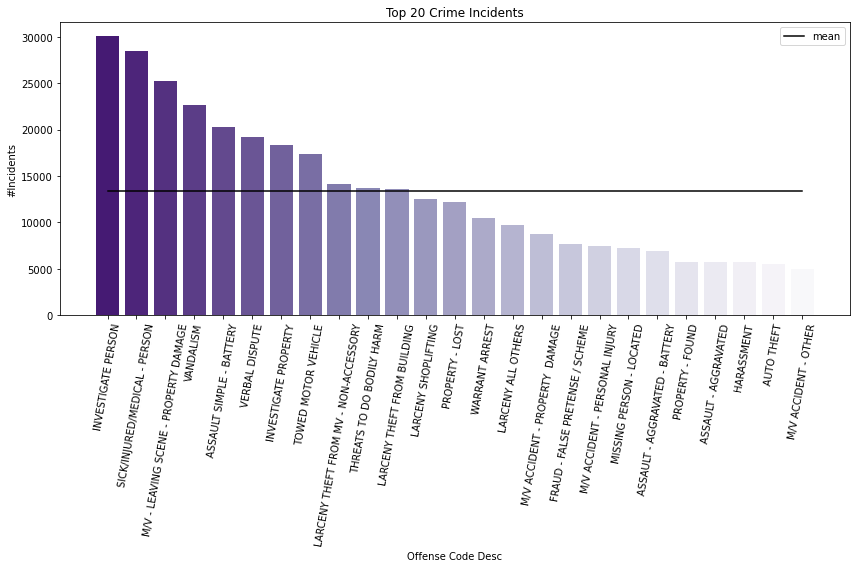

In [807]:
plt.figure(figsize = (12,8))
sns.barplot(x = crime_types_desc.OFFENSE_DESCRIPTION, y = 'NumberofCrimes', data = crime_types_desc, palette = 'Purples_r')
sns.lineplot(x = crime_types_desc.OFFENSE_DESCRIPTION, y = crime_types_desc['NumberofCrimes'].mean(), data = crime_types_desc, label = 'mean', color = 'black') # plot mean value
plt.xticks(rotation=80)
plt.title("Top 20 Crime Incidents")
plt.xlabel("Offense Code Desc")
plt.ylabel("#Incidents")
plt.tight_layout()

In [808]:
crime_types_desc['NumberofCrimes'].mean()

13346.96

SHOOTING_NEW                           OFFENSE_DESCRIPTION        0      1  \
138                                     INVESTIGATE PERSON  29954.0   85.0   
274                          SICK/INJURED/MEDICAL - PERSON  28454.0   11.0   
177                  M/V - LEAVING SCENE - PROPERTY DAMAGE  25232.0    9.0   
290                                              VANDALISM  22471.0  192.0   
21                                ASSAULT SIMPLE - BATTERY  20297.0    7.0   
..                                                     ...      ...    ...   
107                             Evidence Tracker Incidents      1.0    0.0   
113                   FIREARM/WEAPON - CARRY - SELL - RENT      1.0    0.0   
120                                 FRAUD - FALSE PRETENSE      1.0    0.0   
125                                     FRAUDS - ALL OTHER      1.0    0.0   
0             A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.      1.0    0.0   

SHOOTING_NEW    total  
138           30039.0  
274           2

Text(0, 0.5, '#Incidents')

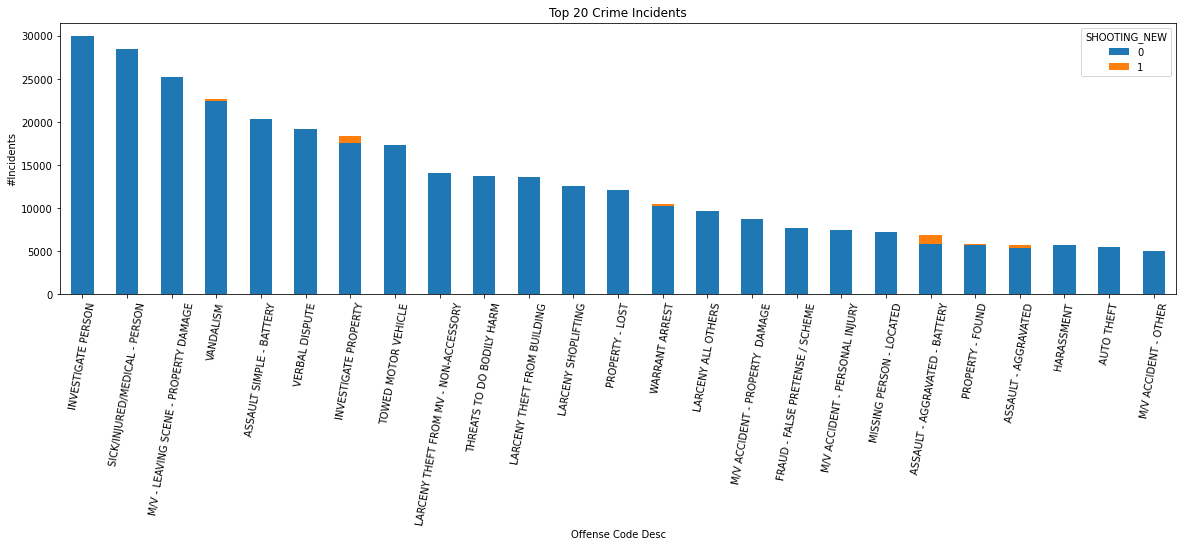

In [809]:
crime_types_desc_shooting = boston_crime_shoot_data.groupby(['OFFENSE_DESCRIPTION','SHOOTING_NEW'])['INCIDENT_NUMBER'].count().unstack().fillna(0)
crime_types_desc_shooting['total'] = crime_types_desc_shooting[0] + crime_types_desc_shooting[1]
crime_types_desc_shooting = crime_types_desc_shooting.reset_index().sort_values(['total'], ascending=False)
print(crime_types_desc_shooting)
crime_types_desc_shooting = crime_types_desc_shooting.head(25)
crime_types_desc_shooting.plot(x="OFFENSE_DESCRIPTION", y=[0,1], kind="bar", stacked=True,figsize=(20,5))
plt.xticks(rotation=80)
plt.title("Top 20 Crime Incidents")
plt.xlabel("Offense Code Desc")
plt.ylabel("#Incidents")

In [810]:
crime_types_group_desc = boston_crime_shoot_data.groupby(['OFFENSE_CODE_GROUP_NEW','OFFENSE_DESCRIPTION'])['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)
print(crime_types_group_desc)

              OFFENSE_CODE_GROUP_NEW  \
136               medical assistance   
99                investigate person   
145  motor vehicle accident response   
472                        vandalism   
468                   simple assault   
..                               ...   
20               auto theft recovery   
19                        auto theft   
18                        auto theft   
428       prisoner related incidents   
0                 aggravated assault   

                              OFFENSE_DESCRIPTION  NumberofCrimes  
136                 SICK/INJURED/MEDICAL - PERSON           20972  
99                             INVESTIGATE PERSON           20439  
145         M/V - LEAVING SCENE - PROPERTY DAMAGE           17965  
472                                     VANDALISM           16588  
468                      ASSAULT SIMPLE - BATTERY           16347  
..                                            ...             ...  
20     AUTO THEFT - OUTSIDE - RECOVERED IN 

In [811]:
crime_types_group_desc = crime_types_group_desc.head(20).sort_values(['OFFENSE_CODE_GROUP_NEW'], ascending=False)
crime_types_group_desc.set_index(['OFFENSE_CODE_GROUP_NEW'], inplace=True)
crime_types_group_desc

,OFFENSE_DESCRIPTION,NumberofCrimes
OFFENSE_CODE_GROUP_NEW,,
warrant arrests,WARRANT ARREST,9806
verbal disputes,VERBAL DISPUTE,14470
vandalism,VANDALISM,16588
towed,TOWED MOTOR VEHICLE,12463
simple assault,ASSAULT SIMPLE - BATTERY,16347
property lost,PROPERTY - LOST,10048
other,THREATS TO DO BODILY HARM,10065
none,M/V - LEAVING SCENE - PROPERTY DAMAGE,7276
none,SICK/INJURED/MEDICAL - PERSON,7493


In [812]:
distict_crime_trend = boston_crime_shoot_data.groupby(['DISTRICT_NEW','YEAR'])['INCIDENT_NUMBER'].count().unstack().fillna(0)
distict_crime_trend

YEAR,2015,2016,2017,2018,2019,2020
DISTRICT_NEW,,,,,,
A1,6022.0,10845.0,11364.0,10976.0,7571.0,7013.0
A15,1027.0,1990.0,2196.0,2034.0,1427.0,1601.0
A7,2421.0,4057.0,4103.0,3800.0,2663.0,3141.0
B2,8859.0,15911.0,16021.0,15760.0,10338.0,10447.0
B3,5676.0,11246.0,11637.0,11602.0,7659.0,7831.0
C11,7356.0,13822.0,13763.0,12987.0,8708.0,8992.0
C6,3936.0,6926.0,7305.0,7516.0,4931.0,5440.0
D14,3279.0,6277.0,6541.0,6173.0,4417.0,4758.0
D4,7335.0,13018.0,12806.0,12462.0,8806.0,9285.0


In [813]:
distict_crime_trend.describe()

YEAR,2015,2016,2017,2018,2019,2020
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,3842.214286,7114.142857,7252.571429,7078.000000,4831.285714,5065.071429
std,2796.211755,5065.095957,5078.875007,4938.156492,3307.072827,3276.742272
min,0.000000,0.000000,0.000000,0.000000,3.000000,246.000000
25%,2244.000000,4093.250000,4117.250000,3873.750000,2721.000000,3254.750000
50%,3052.500000,5945.500000,6079.000000,5846.000000,4244.000000,4468.000000
75%,5935.500000,11145.750000,11568.750000,11445.500000,7637.000000,7626.500000
max,8859.000000,15911.000000,16021.000000,15760.000000,10338.000000,10447.000000


In [814]:
mean_stats = distict_crime_trend.mean()
mean_stats

YEAR
2015    3842.214286
2016    7114.142857
2017    7252.571429
2018    7078.000000
2019    4831.285714
2020    5065.071429
dtype: float64

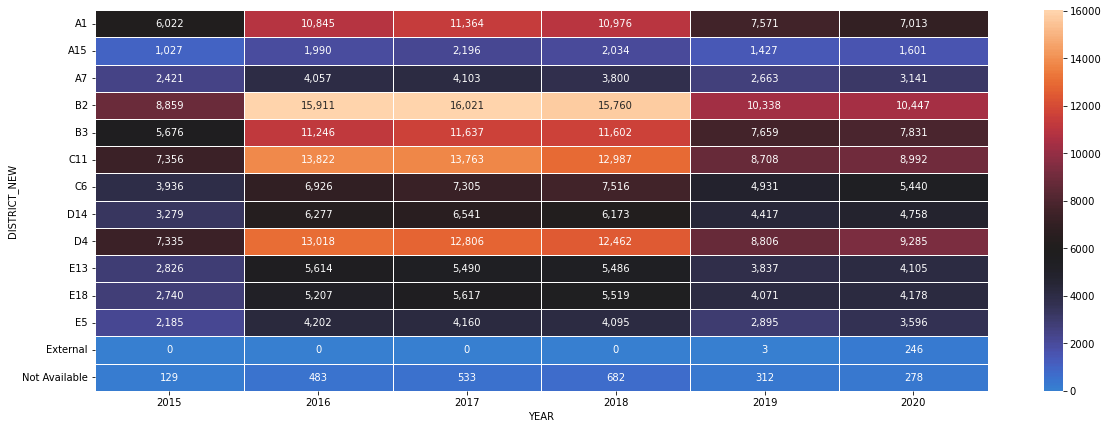

In [815]:
plt.figure(figsize = (20,7))
dc = sns.heatmap(distict_crime_trend,center=mean_stats.mean(), annot=True, linewidths=1,fmt=',g')

In [816]:
distict_crime = boston_crime_shoot_data.groupby(['DISTRICT_NEW'])['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)
distict_crime

,DISTRICT_NEW,NumberofCrimes
3,B2,77336
5,C11,65628
8,D4,63712
4,B3,55651
0,A1,53791
6,C6,36054
7,D14,31445
9,E13,27358
10,E18,27332
11,E5,21133


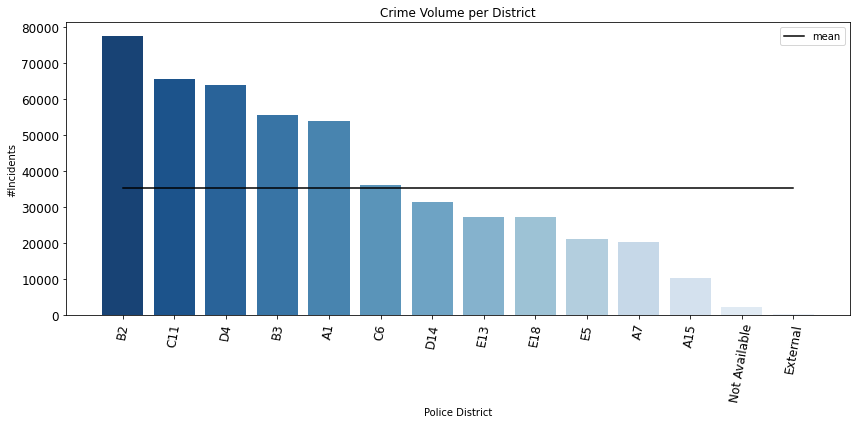

In [817]:
plt.figure(figsize = (12,6))
sns.barplot(x = distict_crime.DISTRICT_NEW, y = 'NumberofCrimes', data = distict_crime, palette = 'Blues_r')
sns.lineplot(x = distict_crime.DISTRICT_NEW, y = distict_crime['NumberofCrimes'].mean(), data = distict_crime, label = 'mean', color = 'black') # plot mean value
plt.xticks(rotation=80)
plt.title("Crime Volume per District")
plt.xlabel("Police District")
plt.ylabel("#Incidents")
plt.tick_params(labelsize = 12)
plt.tight_layout()

In [818]:
distict_crime['NumberofCrimes'].mean()

35183.28571428572

In [819]:
# read Police Districts shapefile with geopandas
gdf = gpd.read_file('./Boston Map/Police_Districts.shp')
gdf

,OBJECTID,DISTRICT,ID,BPDGIS_GIS,DISTRICT_,DISTRICT__,ShapeSTAre,ShapeSTLen,geometry
0,1,A15,A15,A,15,15,3.798392e+07,57616.007190,"MULTIPOLYGON (((771204.900 2967614.950, 771205..."
1,2,A7,A7,A,7,07,1.401151e+08,138468.216080,"MULTIPOLYGON (((792187.300 2969573.400, 792187..."
2,3,A1,A1,A,1,01,4.448484e+07,48957.671219,"POLYGON ((777233.200 2959748.000, 777315.300 2..."
3,4,C6,C6,C,6,06,1.236919e+08,93389.518748,"POLYGON ((779407.000 2954363.800, 779390.500 2..."
4,5,D4,D4,D,4,04,6.999546e+07,41016.808977,"POLYGON ((771263.359 2955490.741, 771418.507 2..."
5,6,D14,D14,D,14,14,1.236253e+08,58025.031627,"POLYGON ((757306.200 2960067.100, 757313.100 2..."
6,7,E13,E13,E,13,13,1.119017e+08,66958.441783,"POLYGON ((760876.381 2946175.581, 760884.029 2..."
7,8,E5,E5,E,5,05,1.916214e+08,87797.653480,"POLYGON ((753345.158 2925394.554, 753346.852 2..."
8,9,B3,B3,B,3,03,9.315897e+07,60468.088955,"POLYGON ((769721.315 2936323.136, 769742.134 2..."
9,10,C11,C11,C,11,11,1.329185e+08,121141.759523,"MULTIPOLYGON (((773840.586 2940789.408, 773836..."


In [820]:
distict_crime
distict_crime.set_index(['DISTRICT_NEW'], inplace=True)
distict_crime

,NumberofCrimes
DISTRICT_NEW,
B2,77336
C11,65628
D4,63712
B3,55651
A1,53791
C6,36054
D14,31445
E13,27358
E18,27332


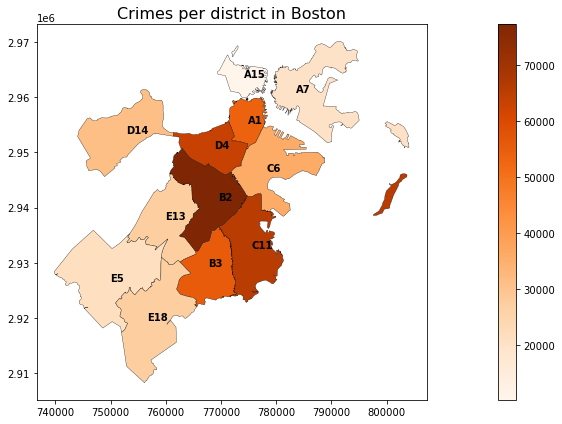

In [821]:
#where are the districts
gdf['crimes'] = gdf.DISTRICT.map(distict_crime['NumberofCrimes']) # use map function to match each district with its corresponding value
ax = gdf.plot(column = gdf.crimes, cmap = 'Oranges', legend = True, edgecolor = 'black', linewidth = 0.3, figsize = (20,6))
add_label()
plt.title('Crimes per district in Boston', fontsize = 16)
plt.tight_layout()

In [822]:
#District B2
distirct_b2  = boston_crime_shoot_data[boston_crime_shoot_data['DISTRICT_NEW']=='B2']
distirct_b2.shape
distirct_b2.head()

,YEAR,YEAR_MONTH,OCCURRED_ON_DATE,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP_NEW,DISTRICT_NEW,STREET,Lat,Long,SHOOTING_NEW,INCIDENT_NUM_NEW,Shooting_Date,Shooting_Type_V2,VICTIM_GENDER_NEW,VICTIM_RACE_NEW,MONTH
0,2020,202002,2020-02-20 00:00:00,854652314,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
1,2020,202002,2020-02-21 01:42:00,457856954,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
13,2020,202002,2020-02-01 12:00:00,212023798,2670,HARASSMENT/ CRIMINAL HARASSMENT,none,B2,LINWOOD ST,42.327996,-71.093314,0,NaN,NaN,NaN,NaN,NaN,2020-01-01
36,2020,202003,2020-03-01 08:00:00,212020026,3201,PROPERTY - LOST/ MISSING,none,B2,CIRCUIT ST,42.328663,-71.085634,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
40,2020,202010,2020-10-13 11:54:00,212019009,1102,FRAUD - FALSE PRETENSE / SCHEME,none,B2,WALNUT AVE,42.320317,-71.087323,0,NaN,NaN,NaN,NaN,NaN,2020-10-01


In [823]:
distirct_b2_trend  = distirct_b2.groupby('YEAR')['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)
distirct_b2_trend

,YEAR,NumberofCrimes
2,2017,16021
1,2016,15911
3,2018,15760
5,2020,10447
4,2019,10338
0,2015,8859


In [824]:
distirct_b2_fatal_shoot_trend  = distirct_b2[distirct_b2['Shooting_Type_V2']=='Fatal']
distirct_b2_fatal_shoot_trend  = distirct_b2_fatal_shoot_trend.groupby('YEAR')['INCIDENT_NUMBER'].count().reset_index(name='FatalShootings').sort_values(['FatalShootings'], ascending=False)
print(distirct_b2_fatal_shoot_trend)

distirct_b2_nonfatal_shoot_trend = distirct_b2[distirct_b2['Shooting_Type_V2']=='Non-Fatal']
distirct_b2_nonfatal_shoot_trend = distirct_b2_nonfatal_shoot_trend.groupby('YEAR')['INCIDENT_NUMBER'].count().reset_index(name='NonFatalShootings').sort_values(['NonFatalShootings'], ascending=False)
print(distirct_b2_nonfatal_shoot_trend)



distirct_b2_overall_crime_trend = distirct_b2_trend.merge(distirct_b2_fatal_shoot_trend, left_on='YEAR', right_on='YEAR', how='left')
distirct_b2_overall_crime_trend = distirct_b2_overall_crime_trend.merge(distirct_b2_nonfatal_shoot_trend, left_on='YEAR', right_on='YEAR', how='left')
distirct_b2_overall_crime_trend = distirct_b2_overall_crime_trend.sort_values(by='YEAR',ascending=True)
distirct_b2_overall_crime_trend.head()

distirct_b2_overall_crime_trend['totalShootings'] = distirct_b2_overall_crime_trend['FatalShootings'] + distirct_b2_overall_crime_trend['NonFatalShootings']
distirct_b2_overall_crime_trend

   YEAR  FatalShootings
1  2016              74
0  2015              47
3  2018              32
2  2017              28
4  2019               3
5  2020               2
   YEAR  NonFatalShootings
3  2018                208
0  2015                172
1  2016                159
2  2017                134
4  2019                 51
5  2020                 23


,YEAR,NumberofCrimes,FatalShootings,NonFatalShootings,totalShootings
5,2015,8859,47,172,219
1,2016,15911,74,159,233
0,2017,16021,28,134,162
2,2018,15760,32,208,240
4,2019,10338,3,51,54
3,2020,10447,2,23,25


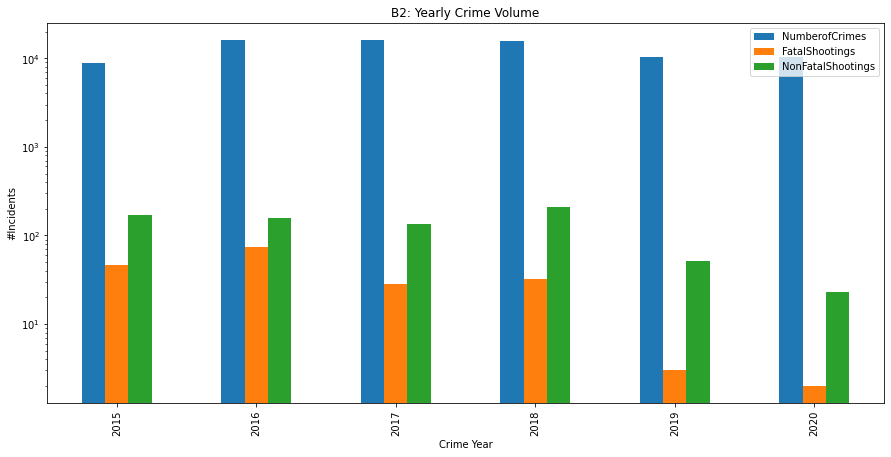

In [825]:
distirct_b2_overall_crime_trend[['YEAR','NumberofCrimes','FatalShootings', 'NonFatalShootings']].plot(x='YEAR', kind='bar',figsize=(15,7))
plt.title("B2: Yearly Crime Volume")
plt.xlabel("Crime Year")
plt.ylabel("#Incidents")
plt.yscale("log")

In [826]:
#percent Change
distirct_b2_overall_crime_trend_pct_change = distirct_b2_overall_crime_trend.set_index('YEAR')
distirct_b2_overall_crime_trend_pct_change = distirct_b2_overall_crime_trend_pct_change.pct_change()
distirct_b2_overall_crime_trend_pct_change = distirct_b2_overall_crime_trend_pct_change.reset_index()
distirct_b2_overall_crime_trend_pct_change.head(7)

,YEAR,NumberofCrimes,FatalShootings,NonFatalShootings,totalShootings
0,2015,NaN,NaN,NaN,NaN
1,2016,0.796027,0.574468,-0.075581,0.063927
2,2017,0.006913,-0.621622,-0.157233,-0.304721
3,2018,-0.016291,0.142857,0.552239,0.481481
4,2019,-0.344036,-0.906250,-0.754808,-0.775000
5,2020,0.010544,-0.333333,-0.549020,-0.537037


/var/folders/bt/5kl7zb6j35v3n70l6dt1khcr0000gn/T/ipykernel_13814/2127285866.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chg_b2.set_yticklabels(['{:,.2%}'.format(x) for x in vals_b2])


Text(0, 0.5, '#Incidents')

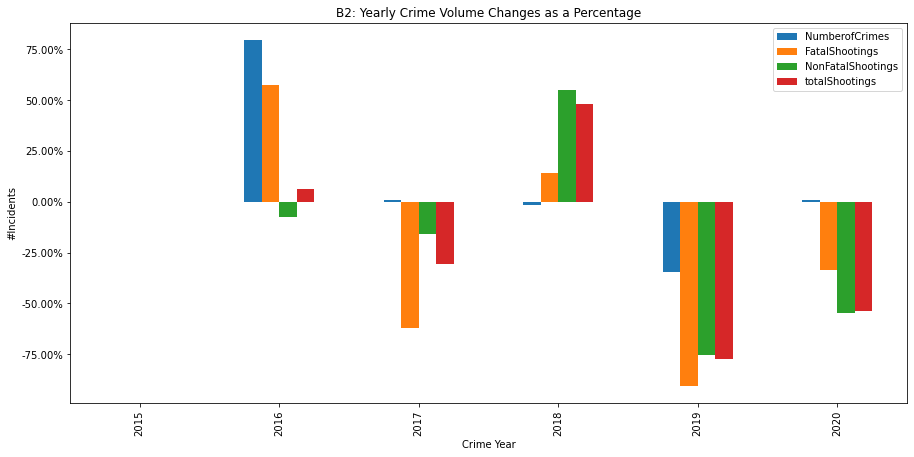

In [827]:
#Crime Changes Over Time
chg_b2 = distirct_b2_overall_crime_trend_pct_change[['YEAR','NumberofCrimes','FatalShootings','NonFatalShootings','totalShootings']].plot(x='YEAR', kind='bar',figsize=(15,7))
vals_b2 = chg_b2.get_yticks()
chg_b2.set_yticklabels(['{:,.2%}'.format(x) for x in vals_b2])
plt.title("B2: Yearly Crime Volume Changes as a Percentage")
plt.xlabel("Crime Year")
plt.ylabel("#Incidents")

In [828]:
distirct_b2.head()

,YEAR,YEAR_MONTH,OCCURRED_ON_DATE,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP_NEW,DISTRICT_NEW,STREET,Lat,Long,SHOOTING_NEW,INCIDENT_NUM_NEW,Shooting_Date,Shooting_Type_V2,VICTIM_GENDER_NEW,VICTIM_RACE_NEW,MONTH
0,2020,202002,2020-02-20 00:00:00,854652314,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
1,2020,202002,2020-02-21 01:42:00,457856954,3115,INVESTIGATE PERSON,none,B2,SCHROEDER PLZ,42.333679,-71.091878,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
13,2020,202002,2020-02-01 12:00:00,212023798,2670,HARASSMENT/ CRIMINAL HARASSMENT,none,B2,LINWOOD ST,42.327996,-71.093314,0,NaN,NaN,NaN,NaN,NaN,2020-01-01
36,2020,202003,2020-03-01 08:00:00,212020026,3201,PROPERTY - LOST/ MISSING,none,B2,CIRCUIT ST,42.328663,-71.085634,0,NaN,NaN,NaN,NaN,NaN,2020-02-01
40,2020,202010,2020-10-13 11:54:00,212019009,1102,FRAUD - FALSE PRETENSE / SCHEME,none,B2,WALNUT AVE,42.320317,-71.087323,0,NaN,NaN,NaN,NaN,NaN,2020-10-01


In [829]:
distirct_b2_street = distirct_b2.groupby('STREET')['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)
distirct_b2_street = distirct_b2.groupby(['STREET','YEAR'])['INCIDENT_NUMBER'].count().unstack(level=1).fillna(0)
distirct_b2_street['Total'] = distirct_b2_street[2015]+distirct_b2_street[2016]+distirct_b2_street[2017]+distirct_b2_street[2018]+distirct_b2_street[2019]+distirct_b2_street[2020]
distirct_b2_street = distirct_b2_street.sort_values(['Total'], ascending=False)
distirct_b2_street = distirct_b2_street.head(20).drop(columns=['Total'])
distirct_b2_street

YEAR,2015,2016,2017,2018,2019,2020
STREET,,,,,,
BLUE HILL AVE,484.0,806.0,890.0,1047.0,613.0,437.0
WASHINGTON ST,502.0,570.0,796.0,592.0,563.0,623.0
DUDLEY ST,394.0,710.0,751.0,833.0,547.0,382.0
WARREN ST,253.0,463.0,547.0,531.0,341.0,307.0
COLUMBIA RD,253.0,506.0,569.0,536.0,320.0,241.0
TREMONT ST,162.0,288.0,283.0,335.0,237.0,221.0
SEAVER ST,98.0,184.0,195.0,247.0,138.0,139.0
HUNTINGTON AVE,123.0,177.0,197.0,178.0,168.0,142.0
HUMBOLDT AVE,113.0,202.0,186.0,214.0,130.0,101.0


In [830]:
distirct_b2_streetmean_stats = distirct_b2_street.mean()
distirct_b2_streetmean_stats

YEAR
2015    155.25
2016    271.35
2017    303.05
2018    315.10
2019    206.70
2020    161.40
dtype: float64

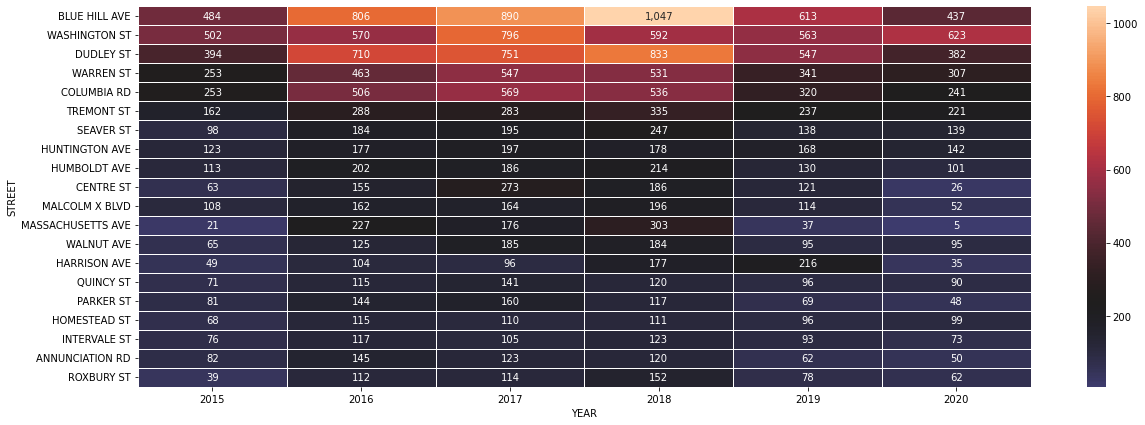

In [831]:
plt.figure(figsize = (20,7))
dc = sns.heatmap(distirct_b2_street,center=distirct_b2_streetmean_stats.mean(), annot=True, linewidths=1,fmt=',g')

In [832]:
distirct_b2['Long'].describe()

count    7.323200e+04
mean    -6.103328e+01
std      2.476814e+01
min     -7.117374e+01
25%     -7.108912e+01
50%     -7.108197e+01
75%     -7.107162e+01
max      5.249691e-08
Name: Long, dtype: float64

In [833]:
distirct_b2.Long.min()

-71.1737388009547

In [834]:
f"{distirct_b2.Long.max():.25f}"

'0.0000000524969124614893000'

In [835]:
distirct_b2.groupby('Long')['INCIDENT_NUMBER'].count().reset_index(name='NumberofCrimes').sort_values(['NumberofCrimes'], ascending=False)

,Long,NumberofCrimes
4301,0.000000e+00,10346
1788,-7.108563e+01,1544
1789,-7.108563e+01,568
3779,-7.107085e+01,541
1000,-7.109317e+01,443
...,...,...
2248,-7.108291e+01,1
2247,-7.108291e+01,1
2246,-7.108292e+01,1
2245,-7.108292e+01,1


In [836]:
BBox = (distirct_b2.Long.min(), distirct_b2.Long.max(),distirct_b2.Lat.min(), distirct_b2.Lat.max())
BBox

(-71.1737388009547, 5.24969124614893e-08, -1.0, 42.39214603)

In [837]:
distirct_b2_loc = distirct_b2[distirct_b2['Long']> -71.12]
distirct_b2_loc = distirct_b2_loc[distirct_b2_loc['Long']< -71.06]
#
BBox = (distirct_b2_loc.Long.min(), distirct_b2_loc.Long.max(),distirct_b2_loc.Lat.min(), distirct_b2_loc.Lat.max())
BBox

(-71.1198995550847, -71.06083917, 42.2483186908873, 42.3747745)

<AxesSubplot:xlabel='Long', ylabel='Lat'>

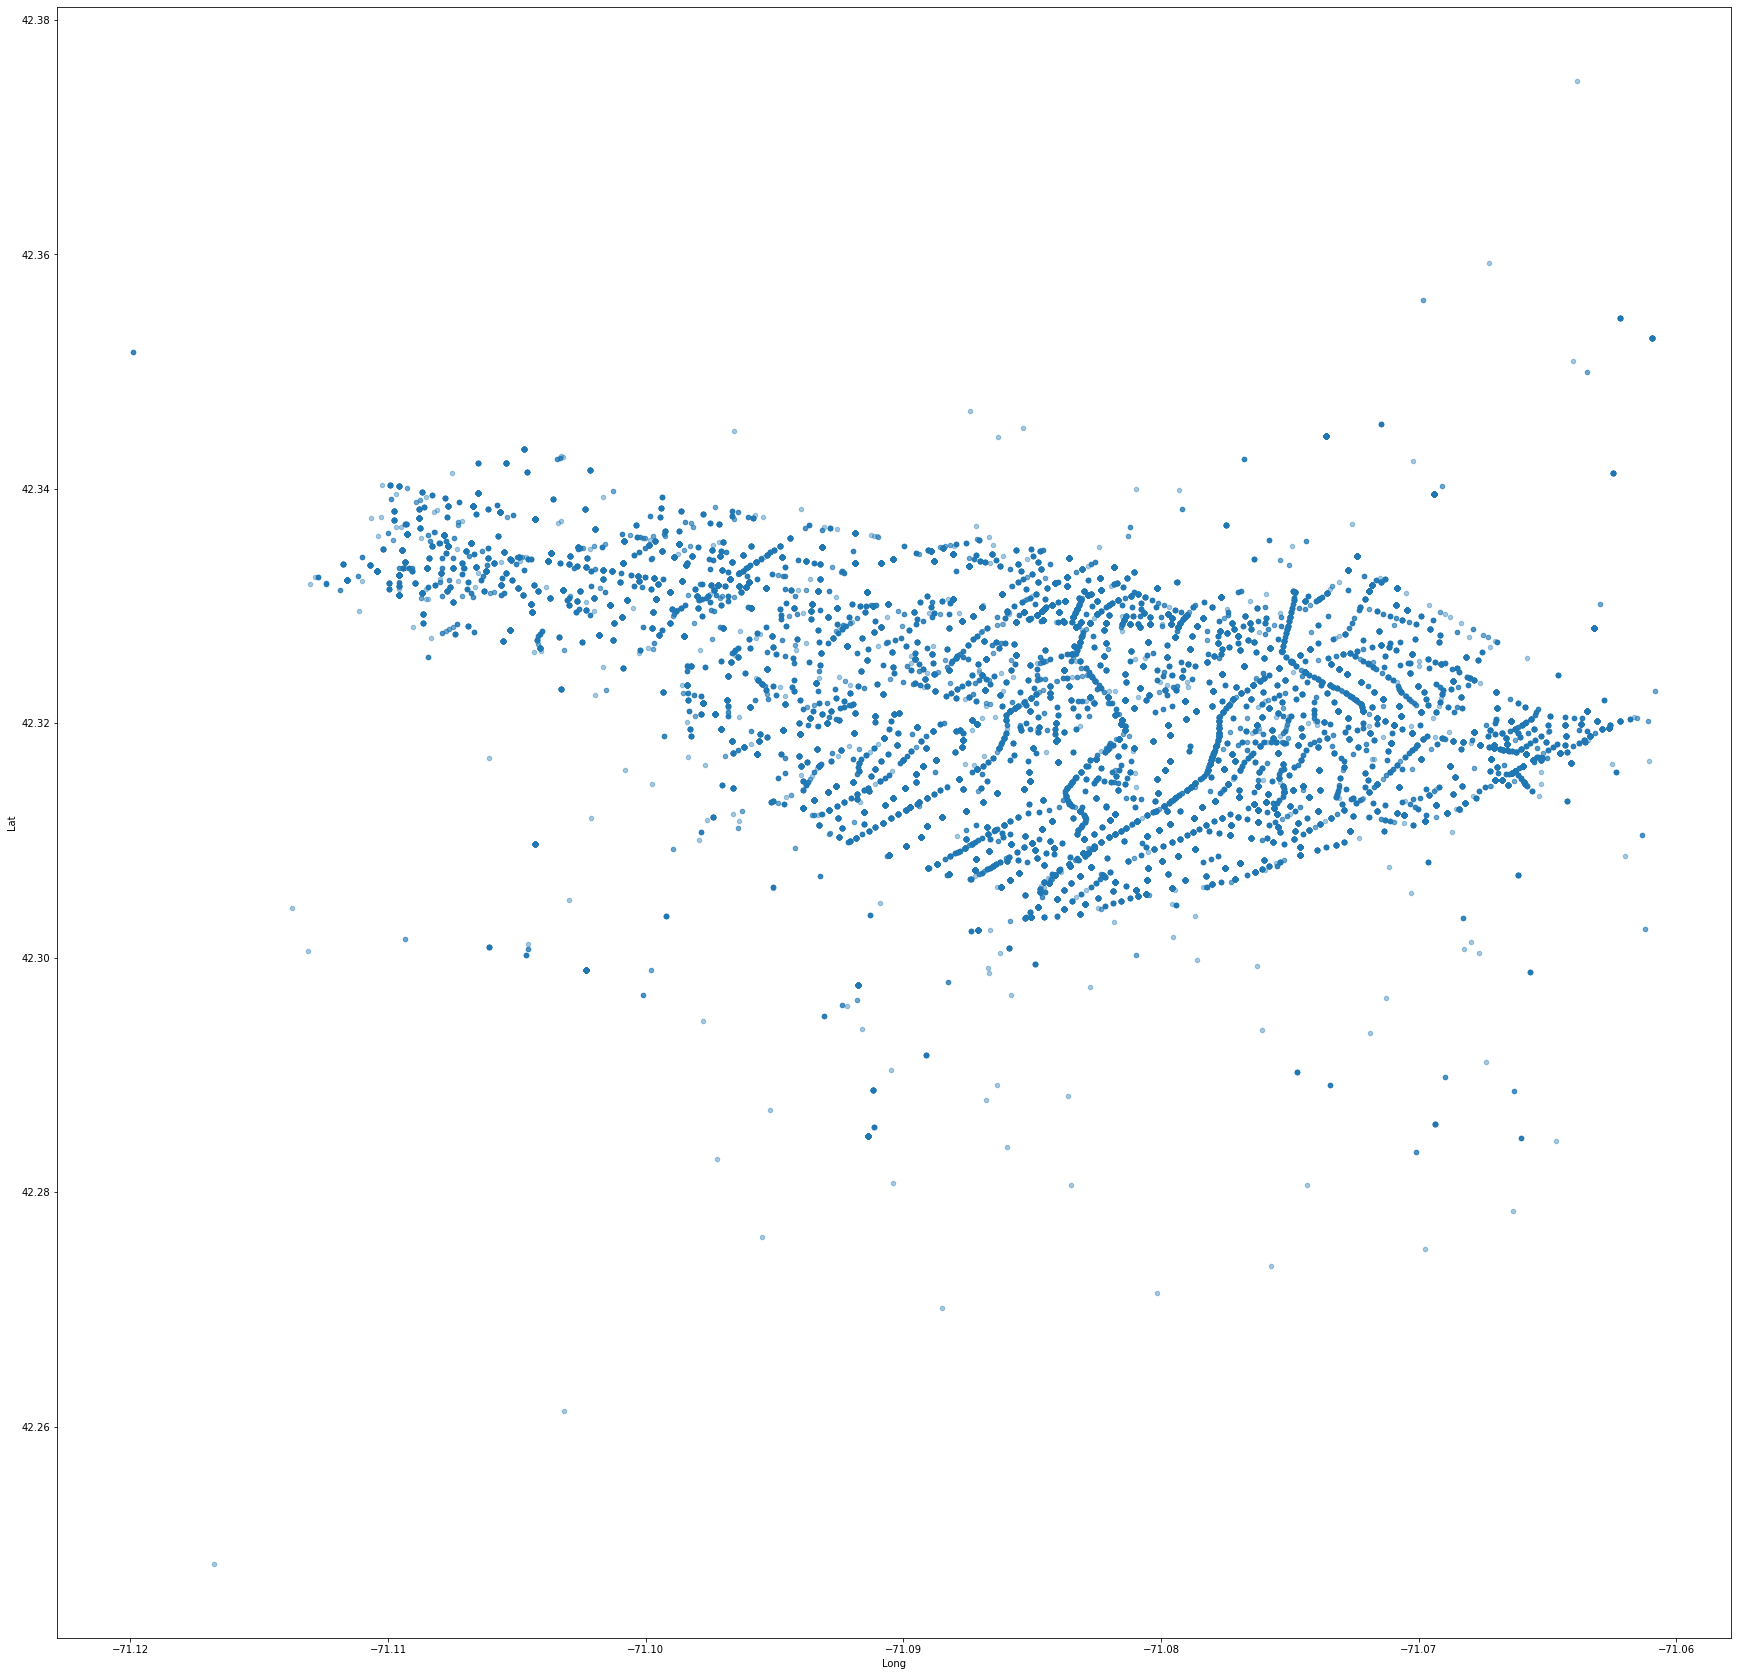

In [838]:
import matplotlib.pyplot as plt
distirct_b2_loc[['Long','Lat']].plot(kind="scatter", x="Long", y="Lat", alpha=0.4,figsize=(30,30))


## Code End